In [1]:
# Changing directory

import os
os.chdir('C:\\Anurag\\Homework\\Week 6')
os.getcwd()   # Current folder


'C:\\Anurag\\Homework\\Week 6'

In [2]:
# Reading data & checking top few data rows

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('diabetes.data',sep='\s+',
                 header=0)
df.head(10)


AGE  SEX   BMI     BP   S1     S2    S3    S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.00  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.00  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.00  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.00  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.00  4.2905  80  135
5   23    1  22.6   89.0  139   64.8  61.0  2.00  4.1897  68   97
6   36    2  22.0   90.0  160   99.6  50.0  3.00  3.9512  82  138
7   66    2  26.2  114.0  255  185.0  56.0  4.55  4.2485  92   63
8   60    2  32.1   83.0  179  119.4  42.0  4.00  4.4773  94  110
9   29    1  30.0   85.0  180   93.4  43.0  4.00  5.3845  88  310

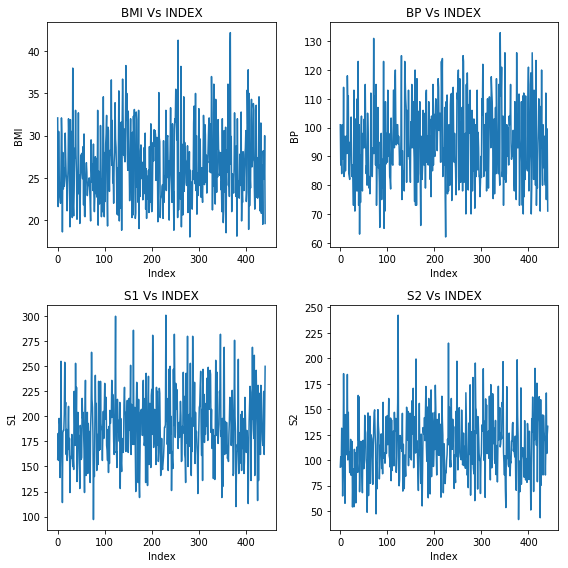

In [3]:
# Multiple plots on the same figure (Make 4 subplots)

fig, axes = plt.subplots(2, 2, figsize=(8,8))

axes[0][0].plot(df['BMI'])
axes[0][0].set_title('BMI Vs INDEX')
axes[0][0].set_xlabel('Index')
axes[0][0].set_ylabel('BMI')

axes[0][1].plot(df['BP'])
axes[0][1].set_title('BP Vs INDEX')
axes[0][1].set_xlabel('Index')
axes[0][1].set_ylabel('BP')

axes[1][0].plot(df['S1'])
axes[1][0].set_title('S1 Vs INDEX')
axes[1][0].set_xlabel('Index')
axes[1][0].set_ylabel('S1')

axes[1][1].plot(df['S2'])
axes[1][1].set_title('S2 Vs INDEX')
axes[1][1].set_xlabel('Index')
axes[1][1].set_ylabel('S2')

plt.tight_layout()


Text(0.5, 1.0, 'Age & BP Vs Index')

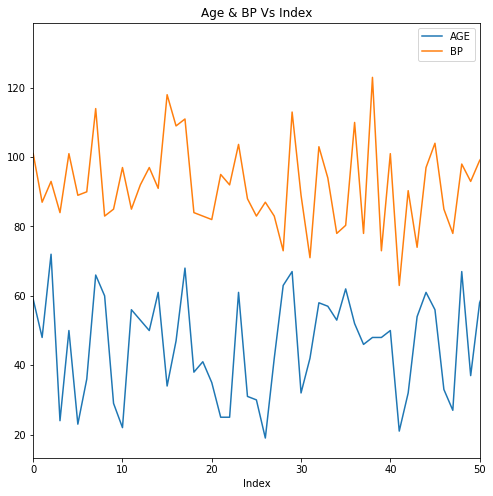

In [4]:
# Multiple plots on the same axis. Age & BP variation for the first 50 data rows.

fig, axes = plt.subplots(1, 1, figsize=(8,8))

axes.plot(df['AGE'])
axes.plot(df['BP'])
axes.set_xlim([0, 50])
axes.set_xlabel('Index')
axes.legend()
axes.set_title("Age & BP Vs Index")



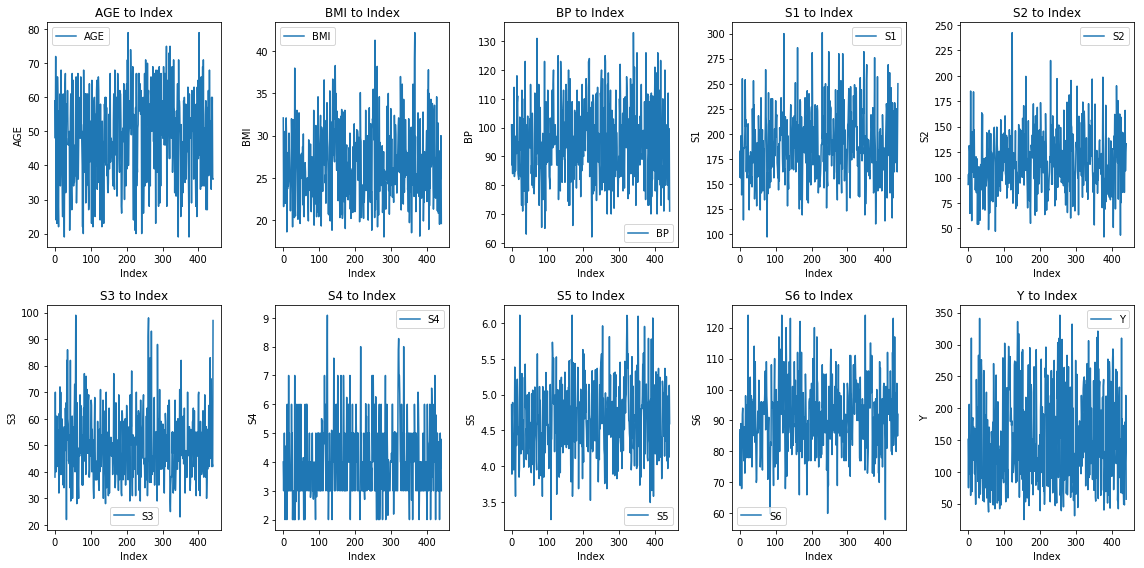

In [5]:
# Subplot of each column at a glance.


fig, axes = plt.subplots(2, 5, figsize=(16, 8))

rc = 0
cc = 0

for column1 in (df.columns) :
    if column1 != 'SEX':
        if cc==5:
            rc = rc+1
            cc = 0
        axes[rc][cc].plot(df[column1])
        axes[rc][cc].set_title(f'{column1} to Index')
        axes[rc][cc].set_xlabel('Index')
        axes[rc][cc].set_ylabel(column1)
        axes[rc][cc].legend()
        cc = cc+1
    plt.tight_layout()
        

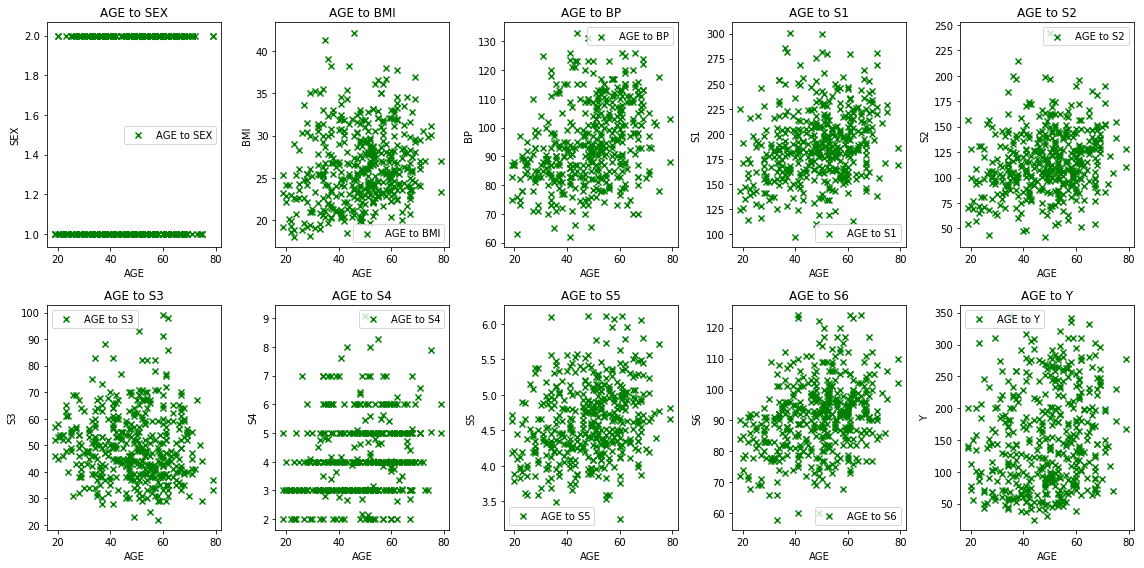

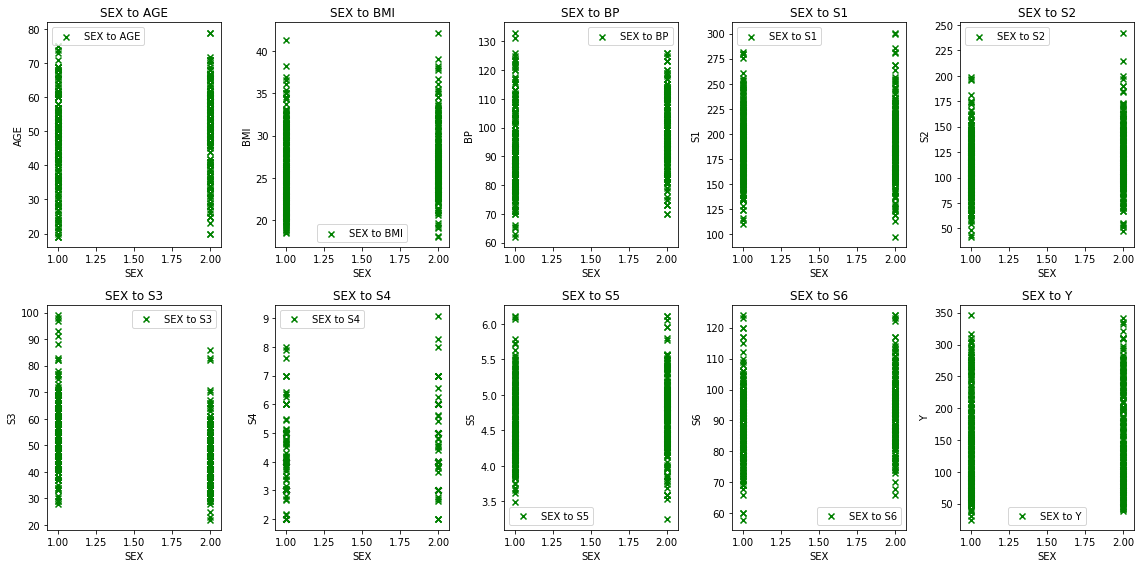

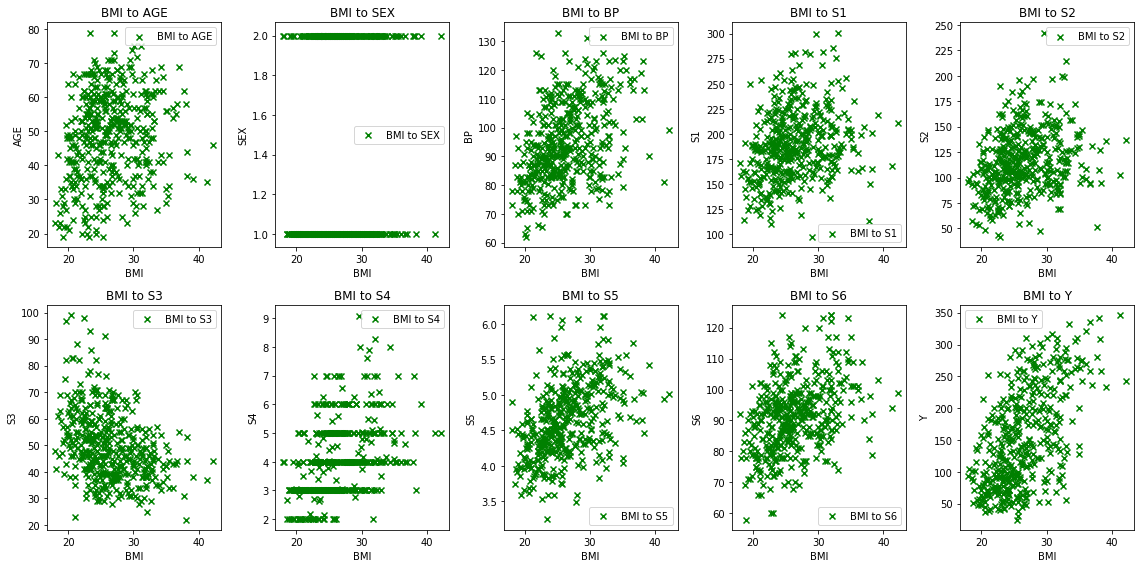

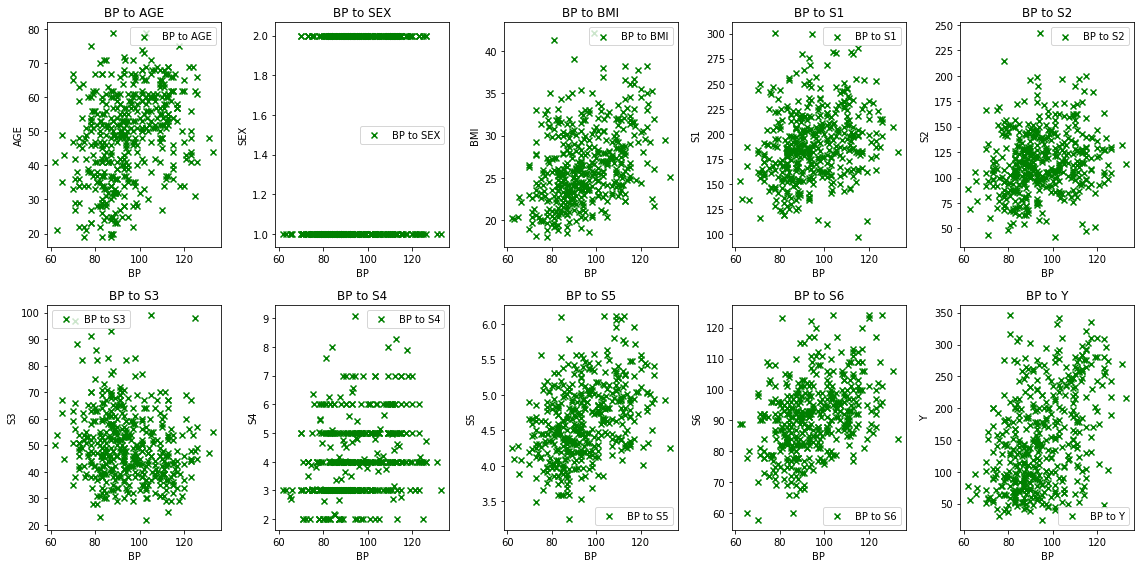

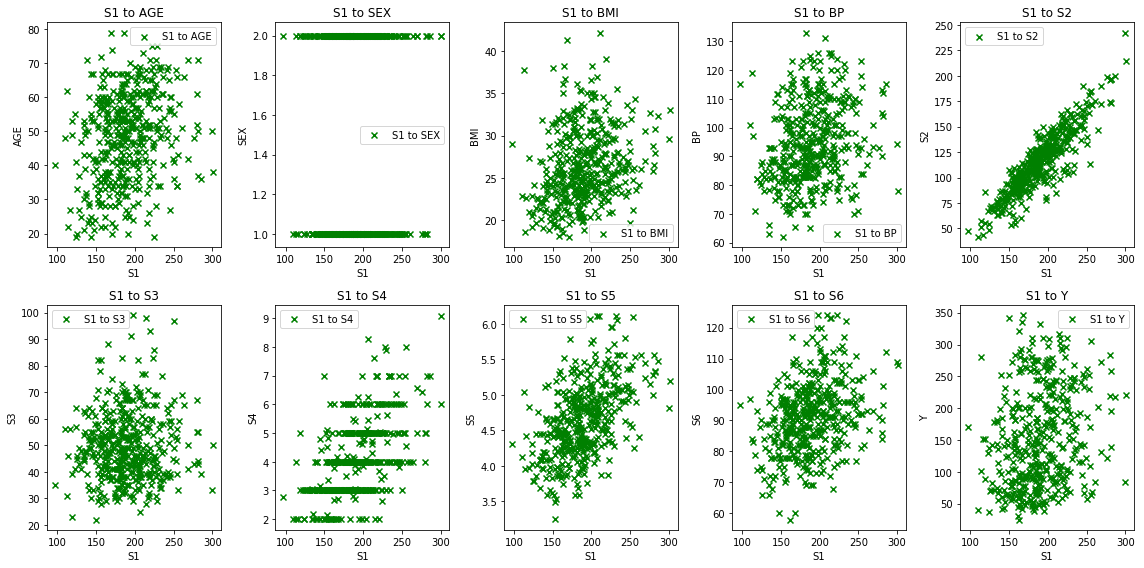

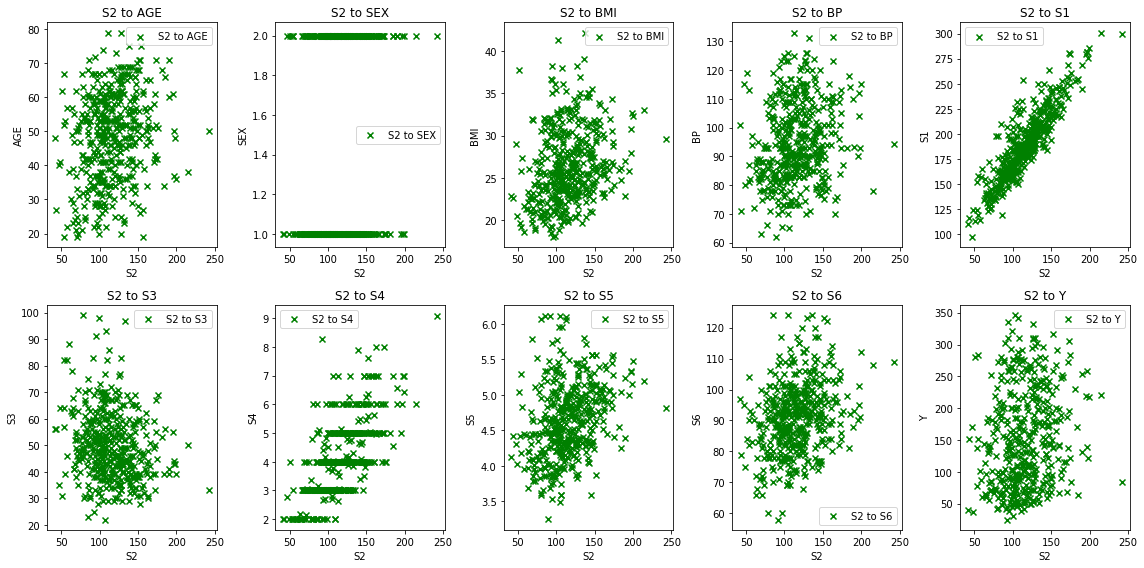

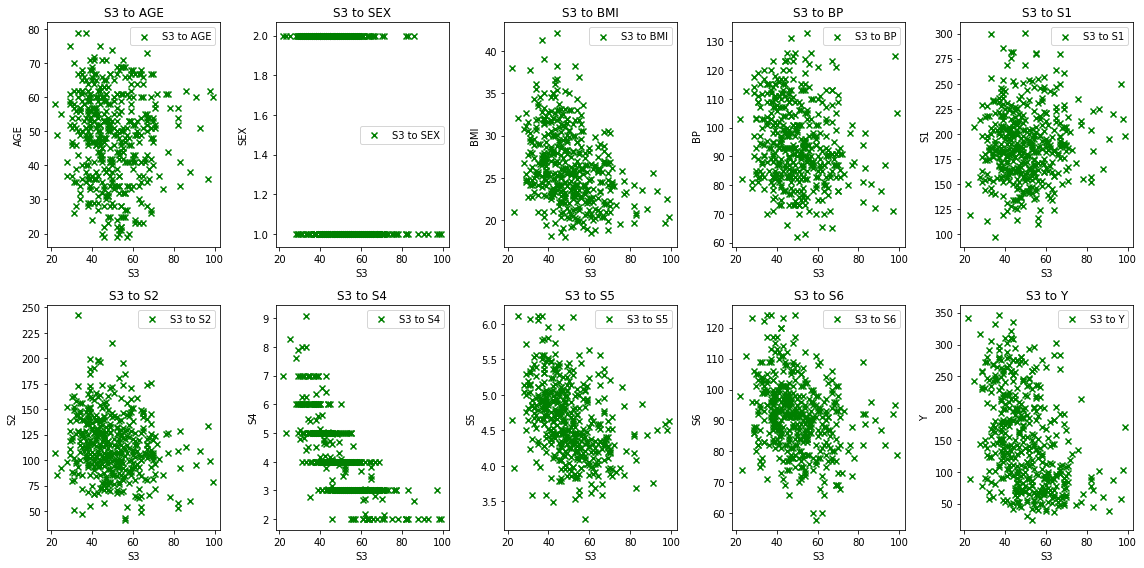

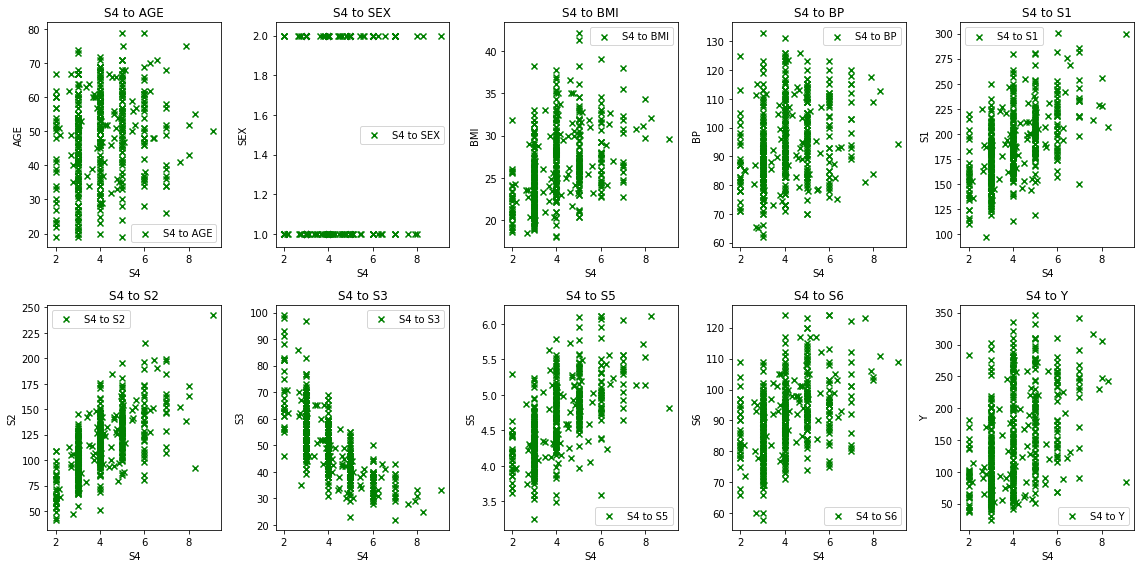

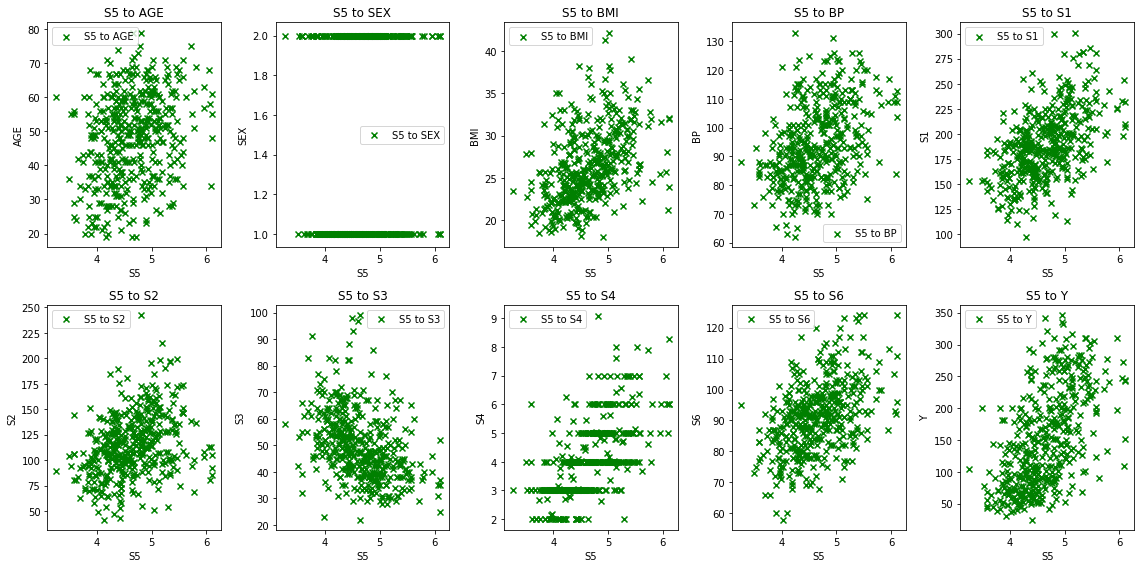

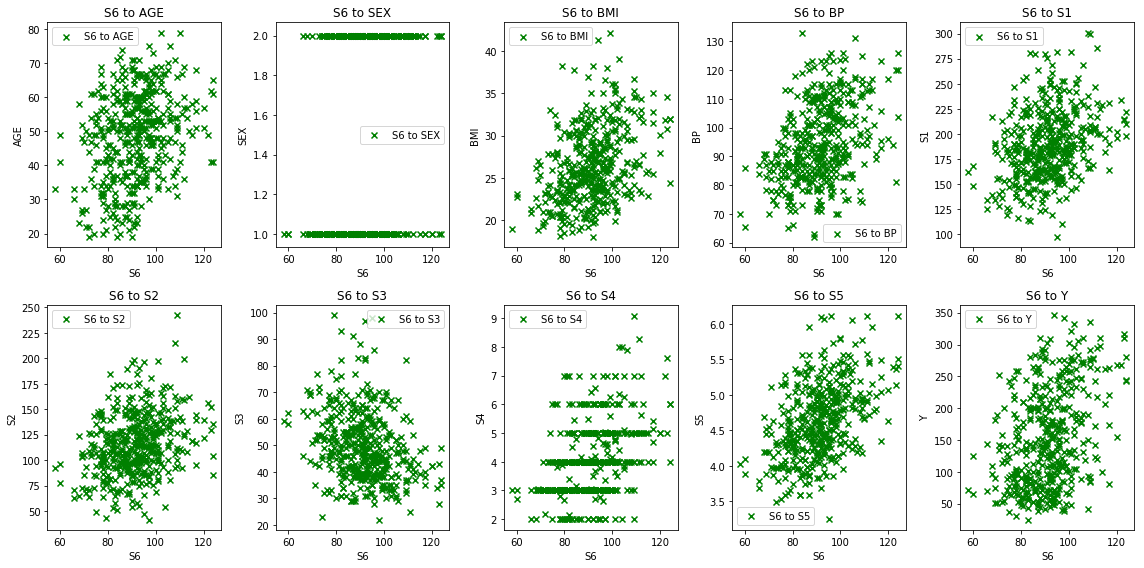

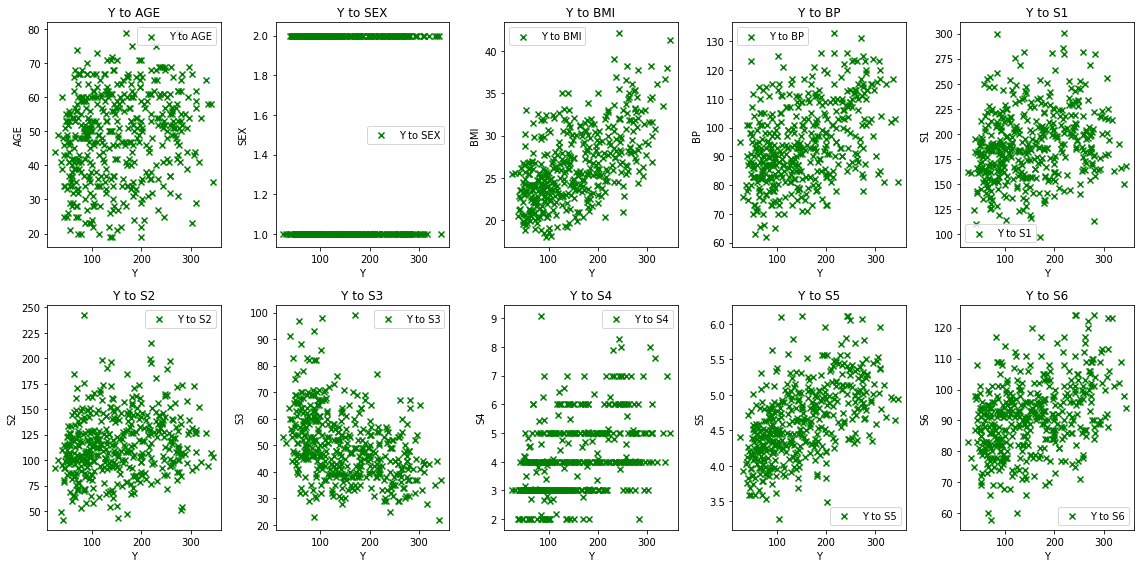

In [6]:
# SCATTERPLOT EACH COLUMN AGAINST EVERY OTHER COLUMN

for col1_idx, column1 in enumerate(df.columns):
    fig, axes = plt.subplots(2, 5, figsize=(16, 8))
    rc=0
    cc=0
    
    for col2_idx, column2 in enumerate(df.columns):
        if column1 != column2:
            if cc==5:
                rc = rc+1
                cc = 0                    
            axes[rc][cc].scatter(df[column1], df[column2], label=f'{column1} to {column2}', color='green', marker='x')
            axes[rc][cc].set_title(f'{column1} to {column2}')
            axes[rc][cc].set_xlabel(column1)
            axes[rc][cc].set_ylabel(column2)
            axes[rc][cc].legend()
            cc = cc+1
    plt.tight_layout()

In [8]:
# FUNCTION TO CREATE AGE CATEGORY

def age_cat(x):
    if 19<=x<31:
        return '19-30'
    elif 31<=x<41:
        return '31-40'
    elif 41<=x<51:
        return '41-50'
    elif 51<=x<61:
        return '51-60'
    elif 61<=x<71:
        return '61-70'
    elif 71<=x<81:
        return '71-80'

In [9]:
# APPLYING FUNCTION TO CREATE 'AGE_CAT' COLUMN
df['AGE_CAT']= df['AGE'].apply(age_cat)

In [10]:
# Sorting data according to AGE_CAT category

sorted_by_age_cat = df.sort_values('AGE_CAT')
sorted_by_age_cat.head()

AGE  SEX   BMI    BP   S1     S2    S3   S4      S5  S6    Y AGE_CAT
41    21    1  20.1  63.0  135   69.0  54.0  3.0  4.0943  89   55   19-30
351   25    2  22.6  85.0  130   71.0  48.0  3.0  4.0073  81   71   19-30
136   23    1  18.8  78.0  145   72.0  63.0  2.0  3.9120  86   85   19-30
134   28    1  30.4  85.0  198  115.6  67.0  3.0  4.3438  80  103   19-30
102   23    1  29.0  90.0  216  131.4  65.0  3.0  4.5850  91  302   19-30

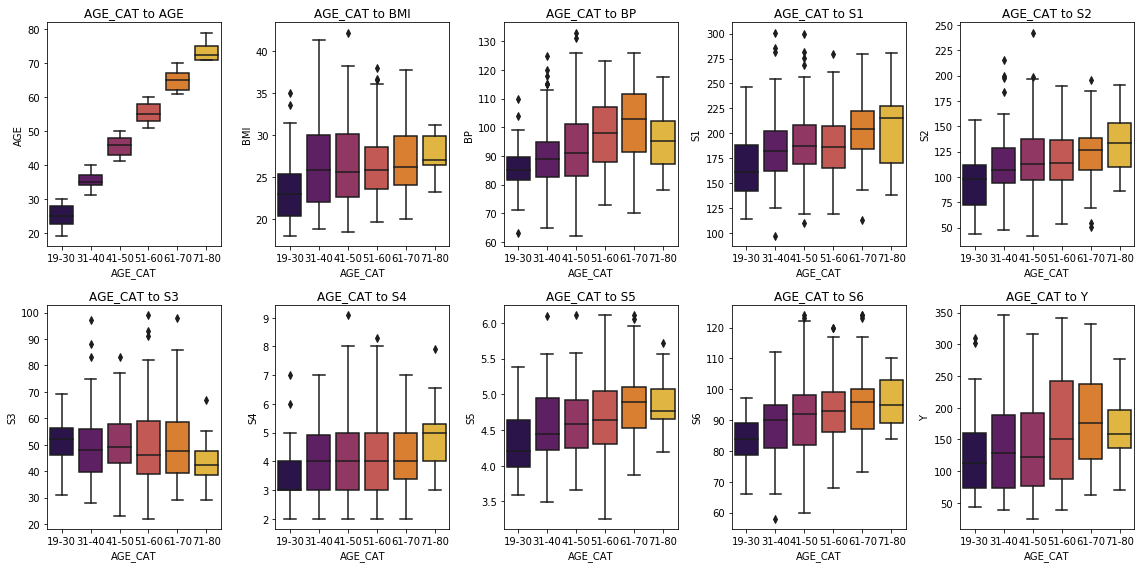

In [11]:
# LOOP TO BOXPLOT AGE_CAT AGAINST EVERY OTHER COLUMN TO SEE THE DISTRIBUTION 

fig, axes = plt.subplots(2, 5, figsize=(16,8))
rc=0
cc=0
for columns in sorted_by_age_cat.columns.drop('AGE_CAT').drop('SEX'):
    if cc==5:
        rc=rc+1
        cc=0
    sns.boxplot('AGE_CAT', df[columns], data=sorted_by_age_cat, palette='inferno',ax=axes[rc][cc])
    axes[rc][cc].set_title(f'AGE_CAT to {columns}')
    plt.tight_layout()
    cc=cc+1

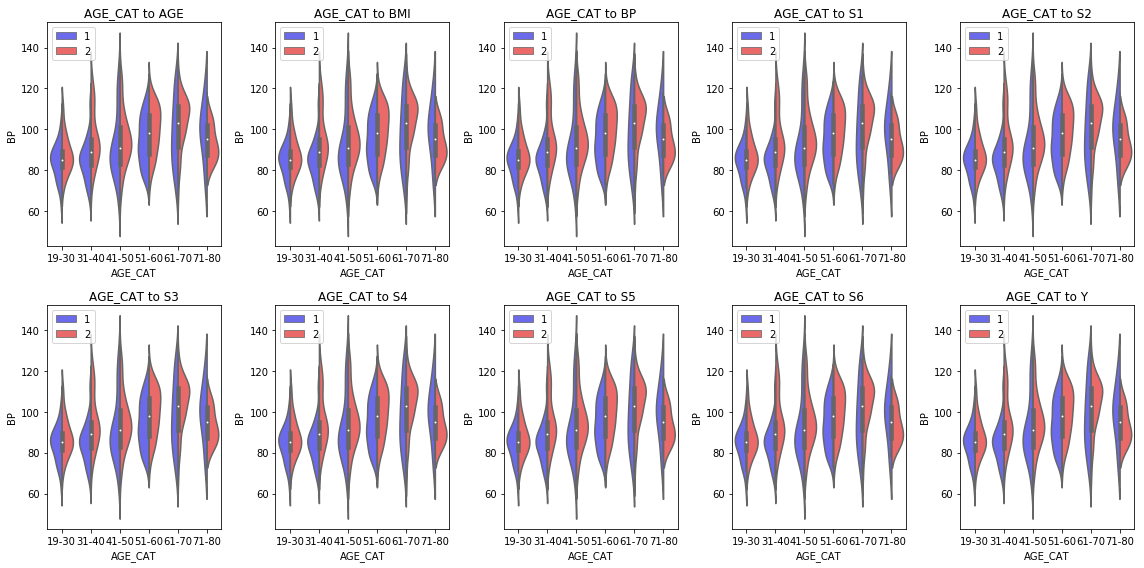

In [12]:
# LOOP TO VIOLIN PLOT AGE_CAT AGAINST EVERY OTHER COLUMN TO SEE THE DISTRIBUTION ACCORDING TO AGE CATEGORY

fig, axes = plt.subplots(2, 5, figsize=(16,8))
rc=0
cc=0
for columns in sorted_by_age_cat.columns.drop('AGE_CAT').drop('SEX'):
    if cc==5:
        rc=rc+1
        cc=0
    sns.violinplot('AGE_CAT', 'BP', data=sorted_by_age_cat, hue='SEX', split=True, palette='seismic',ax=axes[rc][cc])
    axes[rc][cc].set_title(f'AGE_CAT to {columns}')
    axes[rc][cc].legend(loc=2)
    plt.tight_layout()
    cc=cc+1

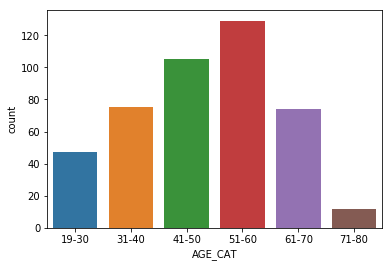

In [36]:
# Checking count according to 'AGE_CAT'
sns.countplot('AGE_CAT', data=sorted_by_age_cat)

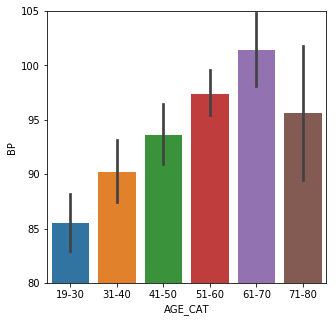

In [82]:
# Checking the change in BP over the different age groups

fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.set_ylim([80, 105])
sns.barplot('AGE_CAT', 'BP', data=sorted_by_age_cat, estimator=np.mean, ax=axes)


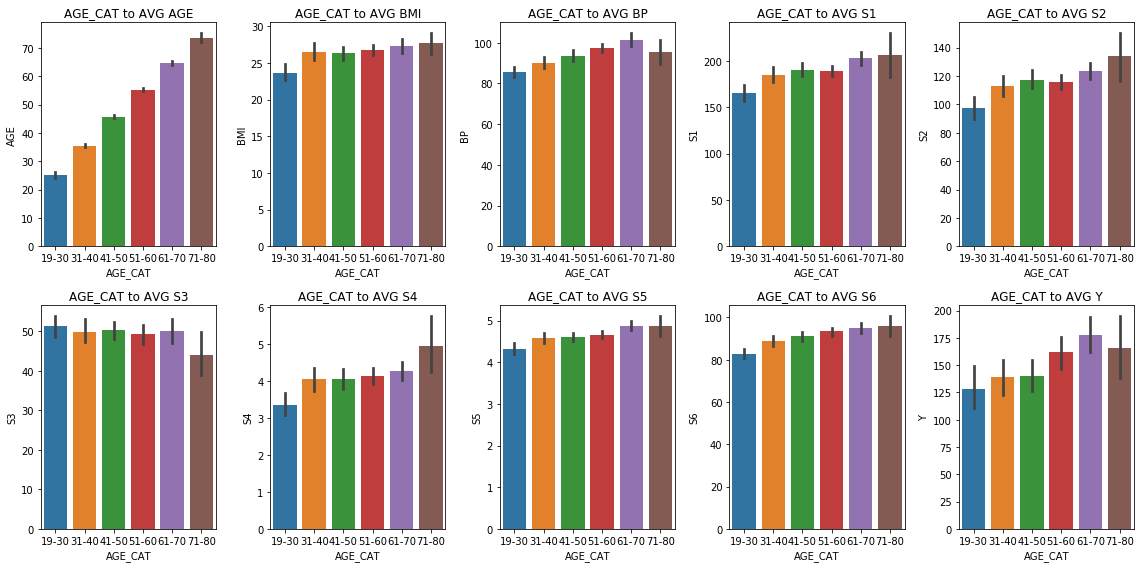

In [13]:
# LOOP TO BARPLOT AGE_CAT AGAINST AVERAGE OF EVERY OTHER COLUMN 

fig, axes = plt.subplots(2, 5, figsize=(16,8))
rc=0
cc=0
for columns in sorted_by_age_cat.columns.drop('AGE_CAT').drop('SEX'):
    if cc==5:
        rc=rc+1
        cc=0
    
    sns.barplot('AGE_CAT', columns, data=sorted_by_age_cat, estimator=np.mean, ax=axes[rc][cc])
    axes[rc][cc].set_title(f'AGE_CAT to AVG {columns}')
    plt.tight_layout()
    cc=cc+1

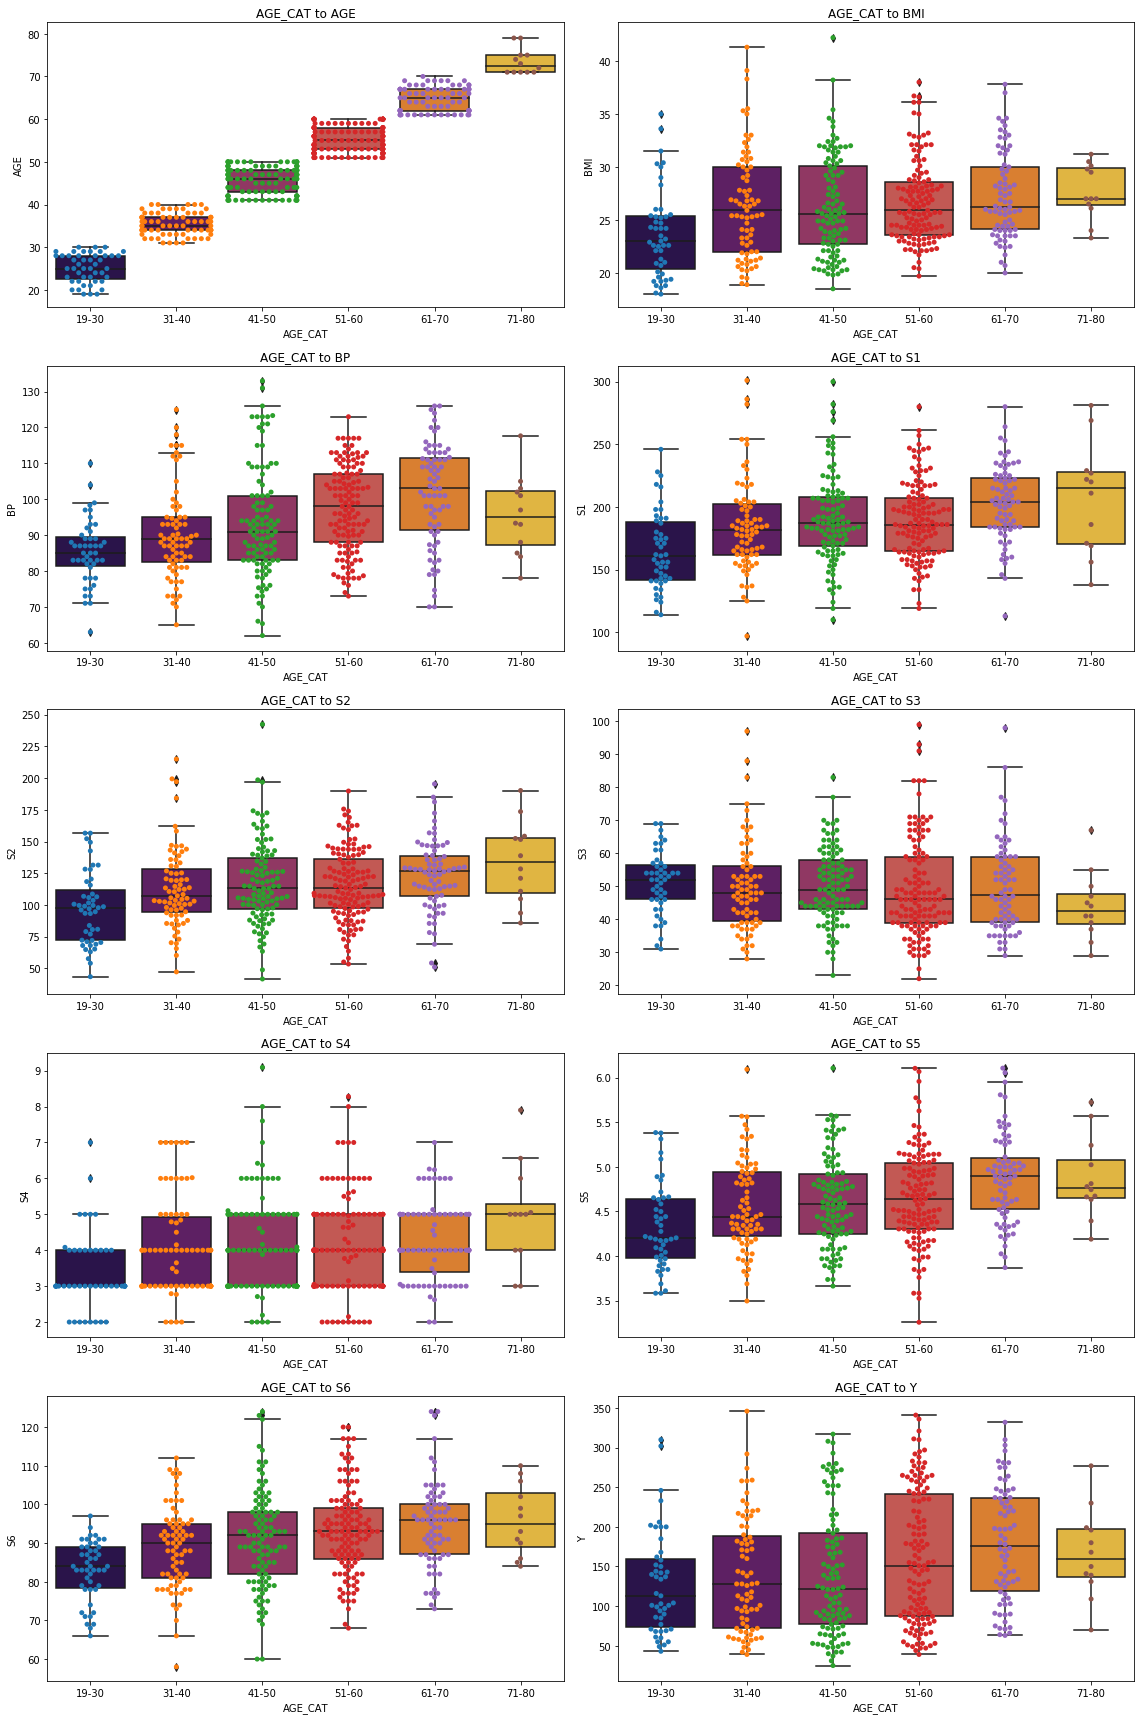

In [50]:
# LOOP TO SWARMPLOT & BOXPLOT AGE_CAT AGAINST AVERAGE OF EVERY OTHER COLUMN 

fig, axes = plt.subplots(5, 2, figsize=(16,24))
rc=0
cc=0
for columns in sorted_by_age_cat.columns.drop('AGE_CAT').drop('SEX'):
    if cc==2:
        rc=rc+1
        cc=0
    sns.swarmplot('AGE_CAT', columns, data=sorted_by_age_cat, ax=axes[rc][cc])
    sns.boxplot('AGE_CAT', columns, data=sorted_by_age_cat, palette='inferno', ax=axes[rc][cc])
    axes[rc][cc].set_title(f'AGE_CAT to {columns}')
    plt.tight_layout()
    cc=cc+1

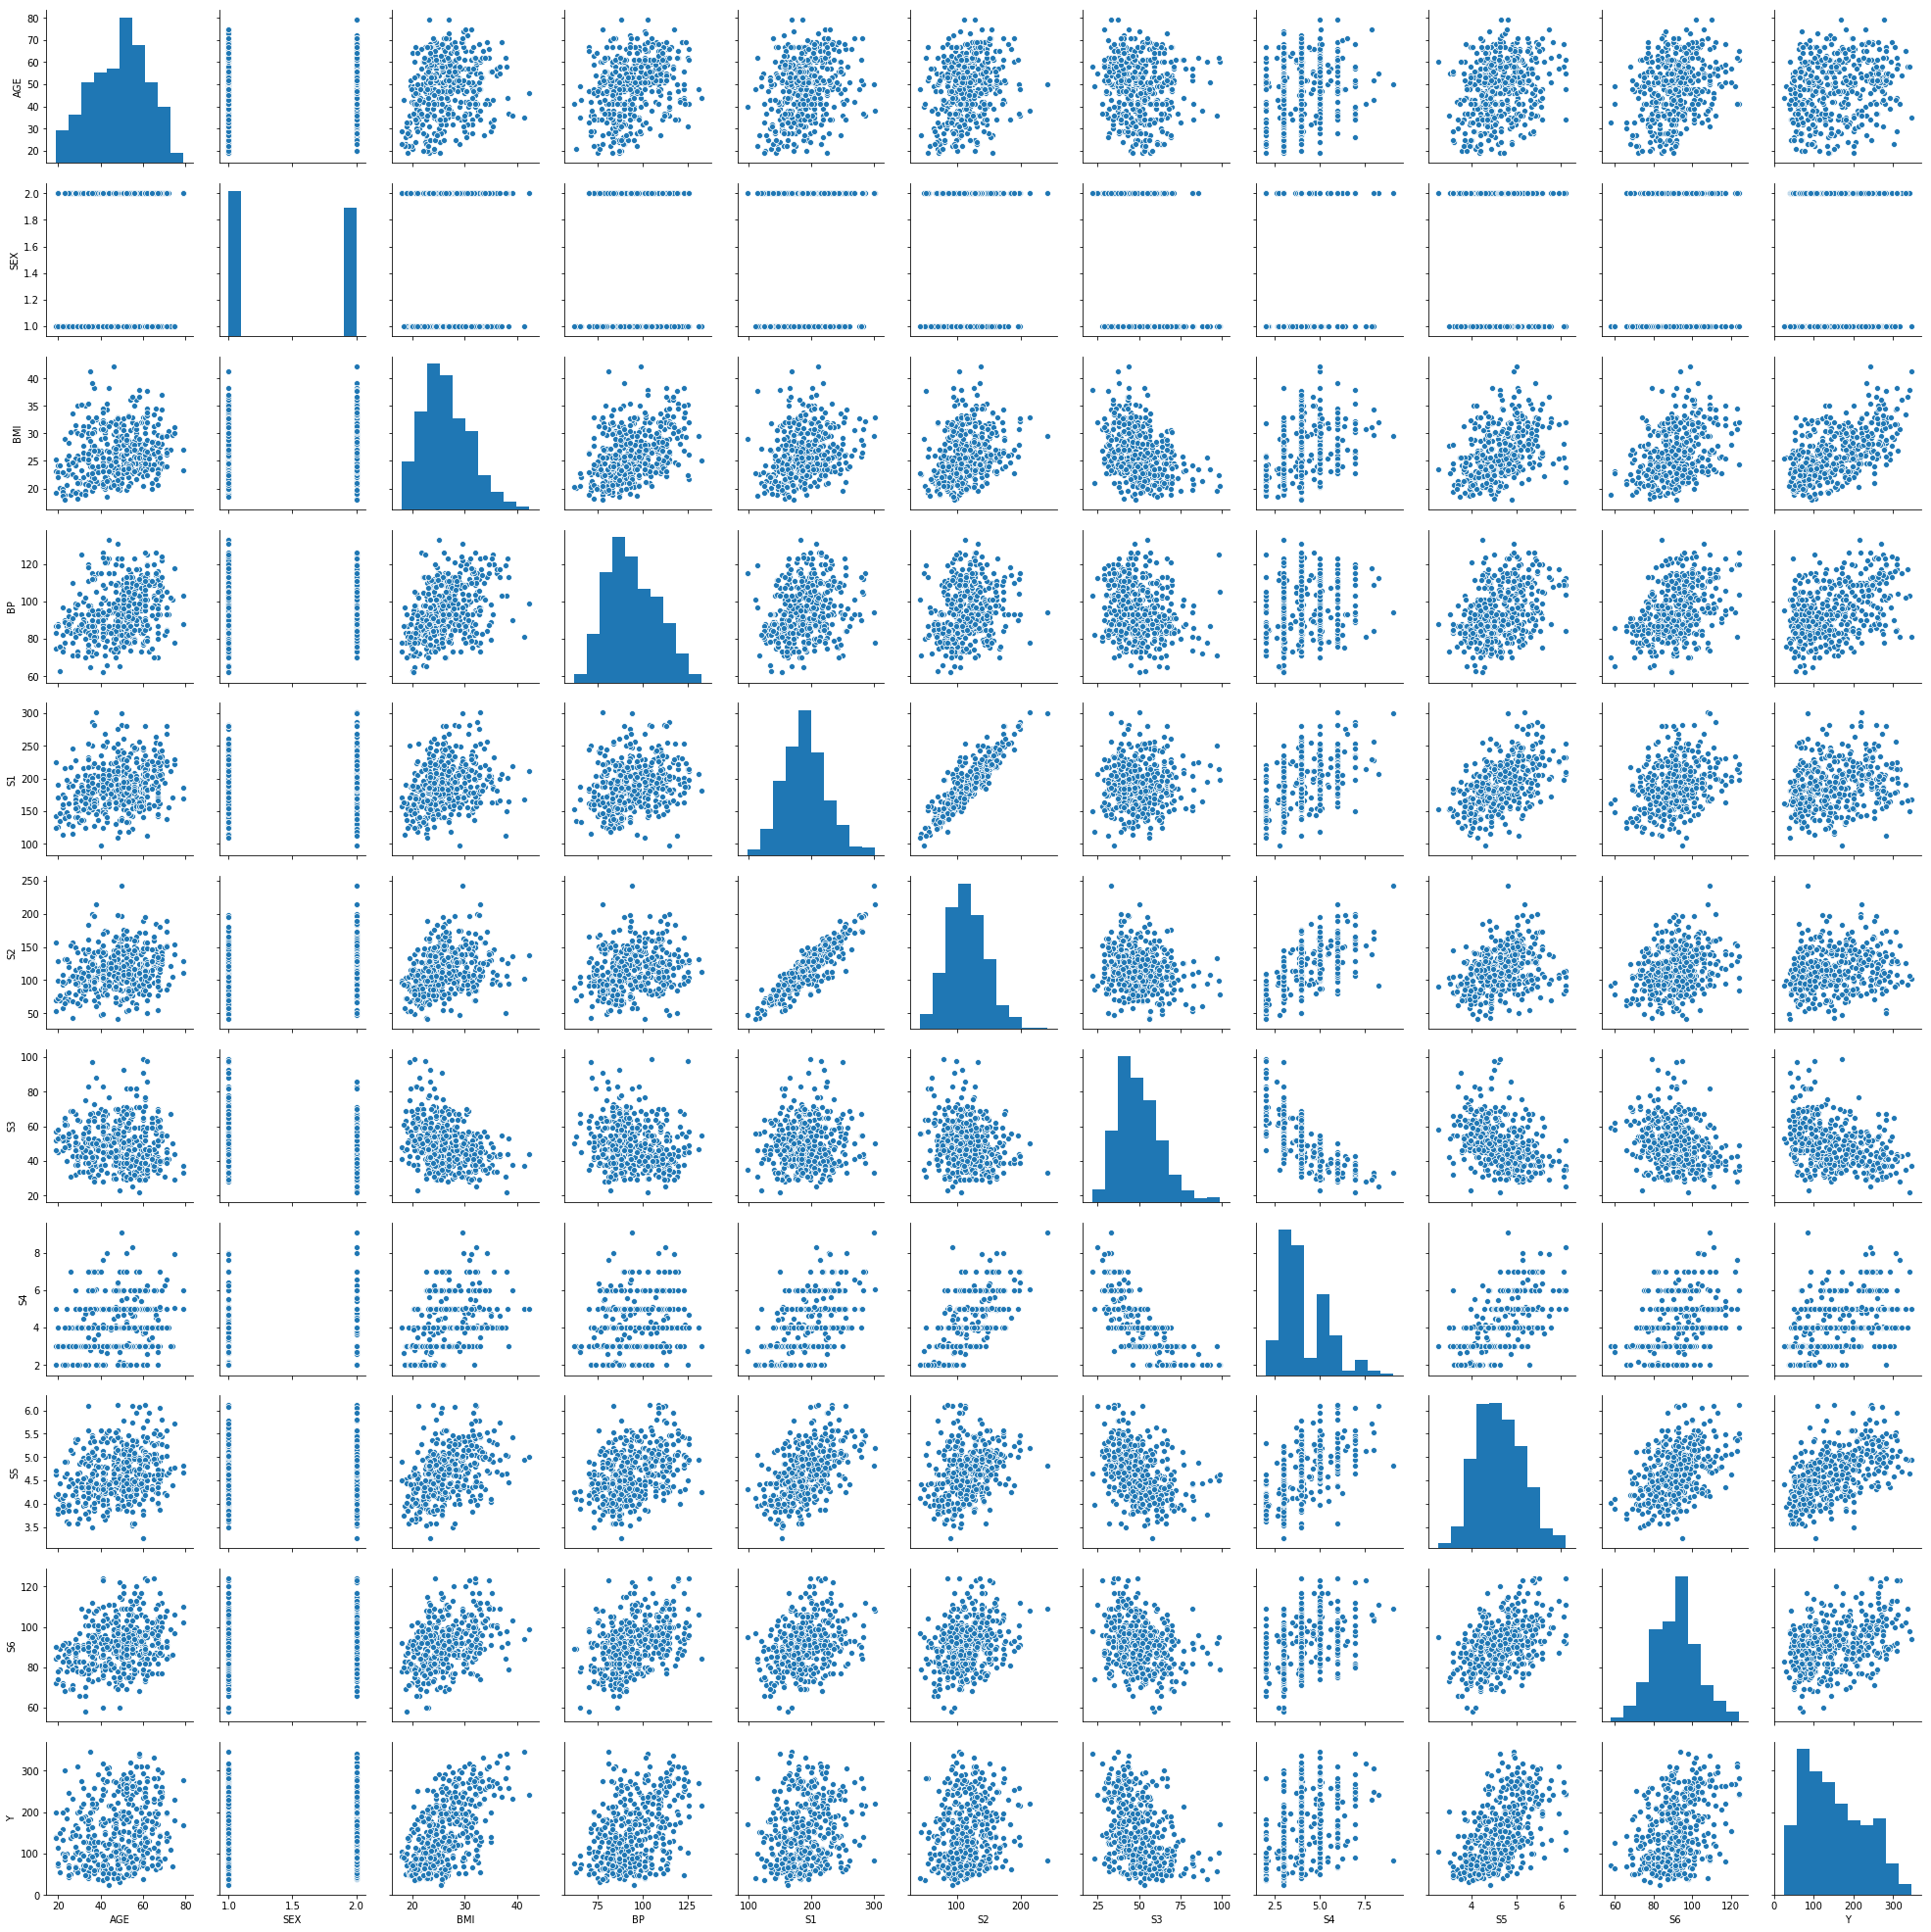

In [66]:
# Pairplot each column against every other column.
sns.pairplot(sorted_by_age_cat)

[Text(0, 0.5, 'AGE'),
 Text(0, 1.5, 'SEX'),
 Text(0, 2.5, 'BMI'),
 Text(0, 3.5, 'BP'),
 Text(0, 4.5, 'S1'),
 Text(0, 5.5, 'S2'),
 Text(0, 6.5, 'S3'),
 Text(0, 7.5, 'S4'),
 Text(0, 8.5, 'S5'),
 Text(0, 9.5, 'S6'),
 Text(0, 10.5, 'Y')]

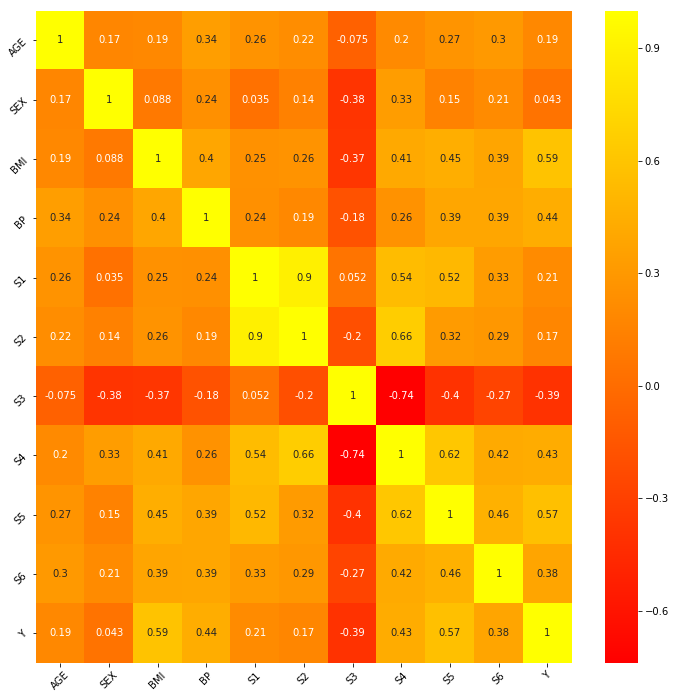

In [14]:
# CORRELATION HEATMAP

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_by_age_cat.corr(), annot=True, cmap='autumn')
ax.set_xticklabels(df.columns, rotation=45)
ax.set_yticklabels(df.columns, rotation=45)


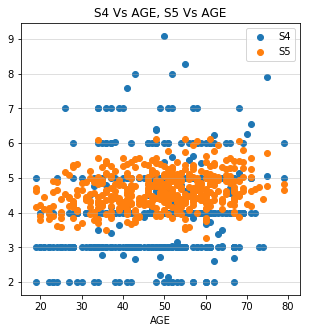

In [16]:
# Multiple scatter plots on same graph.

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.grid(axis='y', alpha=0.5)
axes.scatter(df['AGE'], df['S4'])
axes.scatter(df['AGE'], df['S5'])
axes.set_xlabel('AGE')
axes.set_title(f'S4 Vs AGE, S5 Vs AGE')
axes.legend()


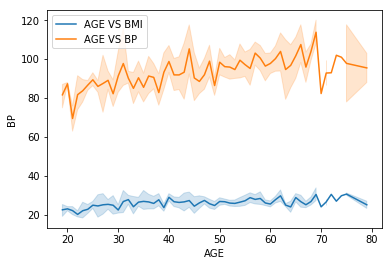

In [31]:
# Seaborn lineplot

sorted_by_age = df.sort_values('AGE')

sns.lineplot('AGE', 'BMI', data=sorted_by_age)
sns.lineplot('AGE', 'BP', data=sorted_by_age)
plt.legend(['AGE VS BMI', 'AGE VS BP'])

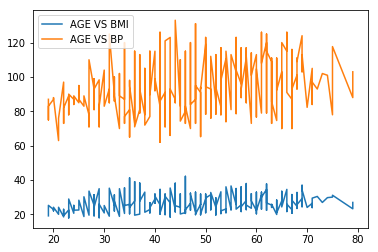

In [34]:
# Matplotlib lineplot

plt.plot('AGE', 'BMI', data =sorted_by_age)
plt.plot('AGE', 'BP', data =sorted_by_age)
plt.legend(['AGE VS BMI', 'AGE VS BP'])


# REACH

In [ ]:
# Create two box plots to compare the fares of male and female with whiskers indicating significant differences
# between the two groups.

In [88]:
# Reading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train_titanic.csv')
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<function seaborn.categorical.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)>

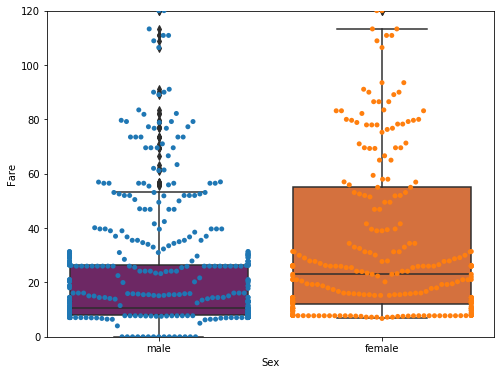

In [86]:
# PLOTTING BOXPLOT (PLUS SWARM PLOT TO SEE THE LOCATIONS OF POINTS)

fig, axes = plt.subplots(1, 1, figsize=(8,6))
sns.boxplot('Sex', 'Fare', data=df, palette='inferno', ax=axes)
sns.swarmplot('Sex', 'Fare', data=df, ax=axes)
axes.set_ylim([0, 120])
sns.boxplot

In [ ]:
# CONCLUSION:

#FROM THE BOX PLOT WITH WHISKERS, WE CAN SEE THAT THIRD QUARTILE FOR MALE ROUGHLY CORRESPONDS TO MEDIAN OF FEMALES. 
#THUS THE FARES FOR FEMALES ARE SIGNIFICANTLY HIGHER THAN MALES.